# How many times does each player win in a $n$-player poker game

In [132]:
import random
from collections import Counter

In [133]:
random.seed(42)

In [134]:
def create_deck():
    ranks = ['2', '3', '4', '5', '6', '7', '8', '9', 'T', 'J', 'Q', 'K', 'A']
    suits = ['H', 'D', 'C', 'S']
    return [rank + suit for rank in ranks for suit in suits]

def deal_hands(deck):
    random.shuffle(deck)
    player1_hand = deck[:2]
    player2_hand = deck[2:4]
    community_cards = deck[4:9]
    return player1_hand, player2_hand, community_cards

def hand_rank(hand):
    """
    Evaluate the given poker hand and return its rank.
    Ranks are determined by hand type and the high card(s) as needed.
    """
    scores = {
        'High Card': 0, 'Pair': 100, 'Two Pairs': 200, 'Three of a Kind': 300,
        'Straight': 400, 'Flush': 500, 'Full House': 600, 'Four of a Kind': 700,
        'Straight Flush': 800
        }
    
    rank_values = {
        '2': 2, '3': 3, '4': 4, '5': 5, '6': 6, '7': 7, '8': 8,
        '9': 9, 'T': 10, 'J': 11, 'Q': 12, 'K': 13, 'A': 14
        }
    ranks = sorted([rank_values[card[0]] for card in hand])
    suits = [card[1] for card in hand]
    
    is_flush = len(set(suits)) == 1
    is_straight = ranks == list(range(min(ranks), min(ranks) + 5))
    counts = Counter(ranks)
    count_values = list(counts.values())
    
    if is_flush and is_straight:
        return scores['Straight Flush'], max(ranks)
    elif 4 in count_values:
        return scores['Four of a Kind'], counts.most_common(1)[0][0]
    elif sorted(count_values) == [2, 3]:
        return scores['Full House'], counts.most_common(1)[0][0]
    elif is_flush:
        return scores['Flush'], max(ranks)
    elif is_straight:
        return scores['Straight'], max(ranks)
    elif 3 in count_values:
        return scores['Three of a Kind'], counts.most_common(1)[0][0]
    elif count_values.count(2) == 2:
        return scores['Two Pairs'], counts.most_common(2)[0][0]
    elif 2 in count_values:
        return scores['Pair'], counts.most_common(1)[0][0]
    else:
        return scores['High Card'], max(ranks)

def evaluate_and_compare_hands(hand1, hand2):
    """
    Evaluate and compare two poker hands.
    Returns 'player1', 'player2', or 'tie' based on which hand is stronger.
    """
    rank1, high_card1 = hand_rank(hand1)
    rank2, high_card2 = hand_rank(hand2)
    
    if rank1 > rank2 or (rank1 == rank2 and high_card1 > high_card2):
        return 'player1'
    elif rank2 > rank1 or (rank1 == rank2 and high_card2 > high_card1):
        return 'player2'
    else:
        return 'tie'


In [135]:
import matplotlib.pyplot as plt

## 2-player

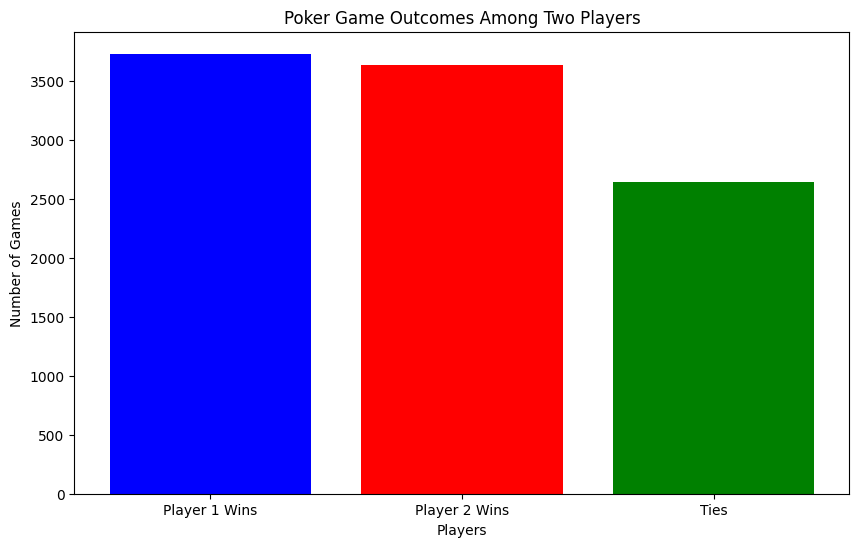

In [136]:
def simulate_games(num_games):
    player1_wins = 0
    player2_wins = 0
    ties = 0
    
    for _ in range(num_games):
        deck = create_deck()
        player1_hand, player2_hand, community_cards = deal_hands(deck)
        
        result = evaluate_and_compare_hands(player1_hand + community_cards, player2_hand + community_cards)
        
        if result == 'player1':
            player1_wins += 1
        elif result == 'player2':
            player2_wins += 1
        else:
            ties += 1
    
    return player1_wins, player2_wins, ties

num_games = 10000
player1_wins, player2_wins, ties = simulate_games(num_games)

categories = ['Player 1 Wins', 'Player 2 Wins', 'Ties']

# Corresponding values from the simulation
values = [player1_wins, player2_wins, ties]

# Creating the bar plot
plt.figure(figsize=(10, 6))
plt.bar(categories, values, color=['blue', 'red', 'green'])

# Adding title and labels
plt.title('Poker Game Outcomes Among Two Players')
plt.xlabel('Players')
plt.ylabel('Number of Games')

# Displaying the plot
plt.show()

## 4-player

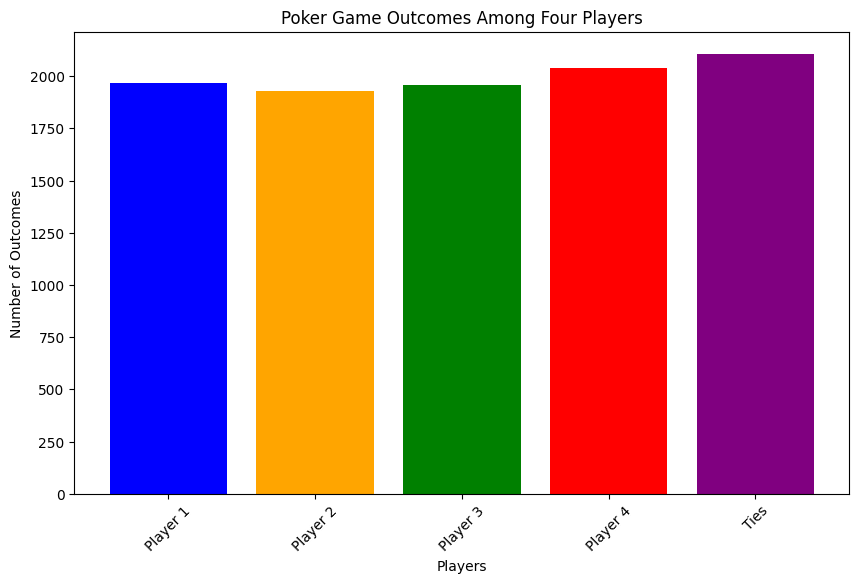

In [137]:
def simulate_games_for_four_players(num_games):
    wins = {'Player 1': 0, 'Player 2': 0, 'Player 3': 0, 'Player 4': 0, 'Ties': 0}

    for _ in range(num_games):
        deck = create_deck()
        random.shuffle(deck)

        hands = [deck[i*2:(i+1)*2] for i in range(4)]
        community_cards = deck[8:13]

        scores = [hand_rank(hands[i] + community_cards) for i in range(4)]

        max_score = max(scores)
        winners = [i for i, score in enumerate(scores) if score == max_score]

        if len(winners) == 1:
            wins[f'Player {winners[0]+1}'] += 1
        else:
            wins['Ties'] += 1

    return wins

num_games = 10000
wins = simulate_games_for_four_players(num_games)

labels = list(wins.keys())
counts = list(wins.values())

plt.figure(figsize=(10, 6))
plt.bar(labels, counts, color=['blue', 'orange', 'green', 'red', 'purple'])
plt.title('Poker Game Outcomes Among Four Players')
plt.xlabel('Players')
plt.ylabel('Number of Outcomes')
plt.xticks(rotation=45)
plt.show()
